<a href="https://colab.research.google.com/github/namth3/googlecolab/blob/master/Citi_challenges_updated_20200302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [1]:
# Run then restart runtime
!apt-get install python3-rtree
!pip install pystac
!pip install geopandas
!pip install rio-tiler
!pip install descartes
!pip install rasterio
!pip install solaris==0.2.0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 25 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 10.6MB/s 
     |████████████████████████████████| 14.7MB 210kB/s 
     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 18.1MB 196kB/s 
  Created wheel for rio-tiler: filename=rio_tiler-1.4.0-cp36-none-any.whl size=173020 sha256=3ae44cbb09ee83f700f1fcdf250c0e80877ff542d9ab984ee88fbf383e99462b
  Stored in directory: /root/.cache/pip/wheels/c4/f1/d3/60b689580c9701d5b5332d8fe3675a3c8a8c8342e192e3a8d5
  Created wheel for rio-toa: filename=rio_toa-0.3.0-cp36-none-any.whl size=12428 sha256=815b959cdb9ff5519068e18246fc6400f9370df4725b282a7bd5cc5362a537dd
  Stored in directory: /root/.cache/pip/wheels/12/25/52/036fe06fa14768bf5e4eef4abd4beccb3924b695199f1721a2
Successfully built rio-tiler rio-toa
     |████████████████████████████████| 10.2MB 2.9MB/s 
     |████████████████████████████████| 92.5MB 30kB/s 
     |████████████████████████████████| 61kB 6.6

In [0]:
# restarts runtime
import os
os._exit(00)

In [1]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import solaris as sol
from pathlib import Path
import rasterio
from rasterio.windows import Window
import geopandas as gpd
from pystac import (Catalog, CatalogType, Item, Asset, LabelItem, Collection)
from rasterio.transform import from_bounds
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from rio_tiler import main as rt_main
import skimage
from tqdm import tqdm
import os
os.environ["CURL_CA_BUNDLE"] = "/etc/ssl/certs/ca-certificates.crt"

# We have to add this wrkaround for stackio:
# (https://pystac.readthedocs.io/en/latest/concepts.html#using-stac-io)
from urllib.parse import urlparse
import requests
from pystac import STAC_IO
def my_read_method(uri):
    parsed = urlparse(uri)
    if parsed.scheme.startswith('http'):
        return requests.get(uri).text
    else:
        return STAC_IO.default_read_text_method(uri)
STAC_IO.read_text_method = my_read_method

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

#LƯU ẢNH TEST VÀO GOOGLE

In [0]:
# Folder Setup
data_dir = Path('/content/drive/My Drive/open_cities_compet/data/test')
data_dir.mkdir(exist_ok=True)

img_path = data_dir/'images-256'
mask_path = data_dir/'masks-256'
img_path.mkdir(exist_ok=True)
mask_path.mkdir(exist_ok=True)

In [4]:
# TO save for later w drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import glob


In [0]:
for c in test_cat.get_items():
  im_folder = 'drive/My Drive/open_cities_compet/data/test/images-256/*.png'
  ims = glob.glob( im_folder )
  ims_2 = [x[55:61] for x in ims]  
  if c.id in ims_2:
    print('Saved')
  else:
     save_area_id_images(img_id = c.id, zoom_level = 16, tile_size = 256)

Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
Saved
TIF URL: https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/test/994dbc/994dbc.tif
Number of tiles: 81
TIF URL: https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/test/574571/574571.tif
Number of tiles: 81
TIF URL: https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/test/a14a9a/a14a9a.tif
Number of tiles: 81


In [0]:
def save_tile_img(tif_url, xyz, tile_size, save_path='', prefix='', display=False):
  x,y,z = xyz
  tile, mask = rt_main.tile(tif_url, x,y,z, tilesize=tile_size)
  if display: 
    plt.imshow(np.moveaxis(tile,0,2))
    plt.show()
  skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}.png',np.moveaxis(tile,0,2), check_contrast=False) 

In [0]:
def save_area_id_images(img_id = 'ca041a', zoom_level = 19, tile_size = 256):

  # The item
  one_item = test_cat.get_item(id=img_id)

  # Load labels shapefile
  gdf = gpd.read_file(one_item.to_dict()['links'][0]['href'])
  # get the geometries from the geodataframe
  all_polys = gdf.geometry

  # Get outlines as polygons
  polygon_geom = Polygon(one_item.to_dict()['geometry']['coordinates'][0])
  polygon = gpd.GeoDataFrame(index=[0], crs=gdf.crs, geometry=[polygon_geom])   

  # Tile at zoom_level
  polygon['geometry'].to_file(img_id+'.geojson', driver='GeoJSON')
  !cat {img_id}.geojson | supermercado burn {zoom_level} | mercantile shapes | fio collect > {img_id}{zoom_level}tiles.geojson

  # Load tiles
  tiles = gpd.read_file(f'{img_id}{zoom_level}tiles.geojson')

  # Add a convenience column
  tiles['xyz'] = tiles.id.apply(lambda x: x.lstrip('(,)').rstrip('(,)').split(','))
  tiles['xyz'] = [[int(q) for q in p] for p in tiles['xyz']]

  # IMG URL
  tif_url = one_item.assets['image'].href

  # Sometimes it's just ./id.tif - add full path (should maybe use make_asset_hrefs_absolute instead!!)
  if tif_url.startswith("./"):
    tif_url = '/'.join(one_item.to_dict()['links'][0]['href'].split("/")[:-1])+tif_url[1:]

  print("TIF URL:", tif_url)

  print("Number of tiles:", len(tiles))

  # Loop through tiles, downloading and saving
  for idx in range(len(tiles)):
    tile, mask = rt_main.tile(tif_url, *tiles.iloc[idx]['xyz'], tilesize=tile_size)

    tile_poly = tiles.iloc[idx]['geometry']

    # get affine transformation matrix for this tile using rasterio.transform.from_bounds: https://rasterio.readthedocs.io/en/stable/api/rasterio.transform.html#rasterio.transform.from_bounds
    tfm = from_bounds(*tile_poly.bounds, tile_size, tile_size) 

    save_tile_img(tif_url, tiles.iloc[idx]['xyz'], tile_size, save_path=img_path, prefix=f'{img_id}_{idx}_', display=False)
    print("Saved", f'{area}_{img_id}_{idx}_')

# Loading the data

In [0]:
# load our training and test catalogs
train1_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_1/catalog.json')
train2_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_2/catalog.json')
test_cat = Catalog.from_file('https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/test/catalog.json')
cols = {cols.id:cols for cols in train1_cat.get_children()}

In [0]:
# Get a list of the possible areas ('scenes) and ids
areas = []
for c in cols:
  itms = [x for x in cols[c].get_all_items()]
  for i, id in enumerate(itms):
    if i % 2 == 0 and i+1 < len(itms):
      areas.append((c, itms[i].id, itms[i+1].id))
print(areas)

[('acc', '665946', '665946-labels'), ('acc', 'a42435', 'a42435-labels'), ('acc', 'ca041a', 'ca041a-labels'), ('acc', 'd41d81', 'd41d81-labels'), ('mon', '401175', '401175-labels'), ('mon', '493701', '493701-labels'), ('mon', '207cc7', '207cc7-labels'), ('mon', 'f15272', 'f15272-labels'), ('ptn', 'abe1a3', 'abe1a3-labels'), ('ptn', 'f49f31', 'f49f31-labels'), ('kam', '4e7c7f', '4e7c7f-labels'), ('dar', 'a017f9', 'a017f9-labels'), ('dar', 'b15fce', 'b15fce-labels'), ('dar', '353093', '353093-labels'), ('dar', 'f883a0', 'f883a0-labels'), ('dar', '42f235', '42f235-labels'), ('dar', '0a4c40', '0a4c40-labels'), ('znz', '33cae6', '33cae6-labels'), ('znz', '3b20d4', '3b20d4-labels'), ('znz', '076995', '076995-labels'), ('znz', '75cdfa', '75cdfa-labels'), ('znz', '9b8638', '9b8638-labels'), ('znz', '06f252', '06f252-labels'), ('znz', 'c7415c', 'c7415c-labels'), ('znz', 'aee7fd', 'aee7fd-labels'), ('znz', '3f8360', '3f8360-labels'), ('znz', '425403', '425403-labels'), ('znz', 'bd5c14', 'bd5c14-l

# Getting the data into a useful form

Ideally, we'd like images in nice squares with the labels as masks - then we can follow normal image segmentation workflows. Currently, the data is all in a stac. This code takes an area (scene), splits it into tiles at a given zoom level (19 works well to see several buildings) and saves each tile + a mask representing the building fotprints. 

Set greyscale=False to get a 3-channel mask with footprints, outlines and contact areas. 

Apologies for the lack of documentation, but for more info and the source of a lot of this code see 
- https://gist.github.com/daveluo/57ada6ba61ff7c947aad8d6aaeeeb9e4
- https://medium.com/@anthropoco/how-to-segment-buildings-on-drone-imagery-with-fast-ai-cloud-native-geodata-tools-ae249612c321

I've also made some of the data available already here: https://www.kaggle.com/johnowhitaker/opencities-masked-256

I'll be working on making a more complete tutorial from start to finish, but I hope this is useful in the meantime.

In [0]:
def save_tile_img(tif_url, xyz, tile_size, save_path='', prefix='', display=False):
  x,y,z = xyz
  tile, mask = rt_main.tile(tif_url, x,y,z, tilesize=tile_size)
  if display: 
    plt.imshow(np.moveaxis(tile,0,2))
    plt.show()
  skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}.png',np.moveaxis(tile,0,2), check_contrast=False) 

def save_tile_mask(labels_poly, tile_poly, xyz, tile_size, save_path='', prefix='', display=False, greyscale=True):
  x,y,z = xyz
  tfm = from_bounds(*tile_poly.bounds, tile_size, tile_size) 
  
  cropped_polys = [poly for poly in labels_poly if poly.intersects(tile_poly)]
  cropped_polys_gdf = gpd.GeoDataFrame(geometry=cropped_polys, crs=4326)
  
  fbc_mask = sol.vector.mask.df_to_px_mask(df=cropped_polys_gdf,
                                         channels=['footprint', 'boundary'],
                                         affine_obj=tfm, shape=(tile_size,tile_size),
                                         boundary_width=5, boundary_type='inner', contact_spacing=5, meters=True)
  
  if display: plt.imshow(fbc_mask); plt.show()
  
  if greyscale:
    skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}_mask.png',fbc_mask[:,:,0], check_contrast=False) 
  else:
    skimage.io.imsave(f'{save_path}/{prefix}{z}_{x}_{y}_mask.png',fbc_mask, check_contrast=False) 

In [0]:
def save_area_id_images(area = 'acc', img_id = 'ca041a', label_id='ca041a-labels', zoom_level = 19, tile_size = 256):

  # The item
  one_item = cols[area].get_item(id=img_id)

  # Load labels shapefile
  lab = cols[area].get_item(id=label_id)
  gdf = gpd.read_file(lab.make_asset_hrefs_absolute().assets['labels'].href)
  # get the geometries from the geodataframe
  all_polys = gdf.geometry

  # Get outlines as polygons
  polygon_geom = Polygon(one_item.to_dict()['geometry']['coordinates'][0])
  polygon = gpd.GeoDataFrame(index=[0], crs=gdf.crs, geometry=[polygon_geom])   

  # Tile at zoom_level
  polygon['geometry'].to_file(img_id+'.geojson', driver='GeoJSON')
  !cat {img_id}.geojson | supermercado burn {zoom_level} | mercantile shapes | fio collect > {img_id}{zoom_level}tiles.geojson

  # Load tiles
  tiles = gpd.read_file(f'{img_id}{zoom_level}tiles.geojson')

  # Add a convenience column
  tiles['xyz'] = tiles.id.apply(lambda x: x.lstrip('(,)').rstrip('(,)').split(','))
  tiles['xyz'] = [[int(q) for q in p] for p in tiles['xyz']]

  # IMG URL
  tif_url = one_item.assets['image'].href

  # Sometimes it's just ./id.tif - add full path (should maybe use make_asset_hrefs_absolute instead!!)
  if tif_url.startswith("./"):
    tif_url = '/'.join(one_item.to_dict()['links'][1]['href'].split("/")[:-1])+tif_url[1:]

  print("TIF URL:", tif_url)

  print("Number of tiles:", len(tiles))

  # Loop through tiles, downloading and saving
  for idx in range(len(tiles)):
    tile, mask = rt_main.tile(tif_url, *tiles.iloc[idx]['xyz'], tilesize=tile_size)

    tile_poly = tiles.iloc[idx]['geometry']

    # get affine transformation matrix for this tile using rasterio.transform.from_bounds: https://rasterio.readthedocs.io/en/stable/api/rasterio.transform.html#rasterio.transform.from_bounds
    tfm = from_bounds(*tile_poly.bounds, tile_size, tile_size) 

    # crop geometries to what overlaps our tile polygon bounds
    cropped_polys = [poly for poly in all_polys if poly.intersects(tile_poly)]
    cropped_polys_gdf = gpd.GeoDataFrame(geometry=cropped_polys, crs='epsg:4326')

    # burn a footprint/boundary/contact 3-channel mask with solaris: https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_masks_tutorial.html
    fbc_mask = sol.vector.mask.df_to_px_mask(df=cropped_polys_gdf, channels=['footprint', 'boundary'], affine_obj=tfm, shape=(tile_size,tile_size),boundary_width=5, boundary_type='inner', contact_spacing=5, meters=True)

    save_tile_img(tif_url, tiles.iloc[idx]['xyz'], tile_size, save_path=img_path, prefix=f'{area}_{img_id}_{idx}_', display=False)
    save_tile_mask(all_polys, tile_poly, tiles.iloc[idx]['xyz'], tile_size, save_path=mask_path,prefix=f'{area}_{img_id}_{idx}_', display=False)
    print("Saved", f'{area}_{img_id}_{idx}_')

In [0]:
save_area_id_images(area = 'acc', img_id = '665946', label_id='665946-labels', zoom_level = 19, tile_size = 256)

TIF URL: https://drivendata-competition-building-segmentation.s3-us-west-1.amazonaws.com/train_tier_1/acc/665946/665946.tif
Number of tiles: 459
Saved acc_665946_0_
Saved acc_665946_1_
Saved acc_665946_2_
Saved acc_665946_3_
Saved acc_665946_4_
Saved acc_665946_5_
Saved acc_665946_6_
Saved acc_665946_7_
Saved acc_665946_8_
Saved acc_665946_9_
Saved acc_665946_10_
Saved acc_665946_11_
Saved acc_665946_12_
Saved acc_665946_13_
Saved acc_665946_14_
Saved acc_665946_15_
Saved acc_665946_16_
Saved acc_665946_17_
Saved acc_665946_18_
Saved acc_665946_19_
Saved acc_665946_20_
Saved acc_665946_21_
Saved acc_665946_22_
Saved acc_665946_23_
Saved acc_665946_24_
Saved acc_665946_25_
Saved acc_665946_26_
Saved acc_665946_27_
Saved acc_665946_28_
Saved acc_665946_29_
Saved acc_665946_30_
Saved acc_665946_31_
Saved acc_665946_32_
Saved acc_665946_33_
Saved acc_665946_34_
Saved acc_665946_35_
Saved acc_665946_36_
Saved acc_665946_37_
Saved acc_665946_38_
Saved acc_665946_39_
Saved acc_665946_40_
Save

In [0]:
# TO save for later w drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Compress
!tar -czf my_data.tar.gz data

In [0]:
# copy training data compressed tarball to drive
!cp my_data.tar.gz /content/drive/My\ Drive/ 

In [0]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

# Check that it worked!

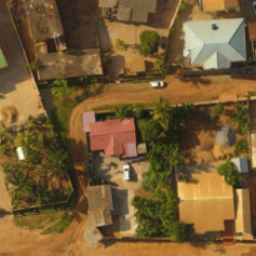

In [0]:
# Pick a random tile
import glob, random
from IPython.display import Image as SHOW_IM
images = glob.glob('/content/drive/My Drive/Colab Notebooks/data/images-256/*.png')
im = random.choice(images)
SHOW_IM(im)

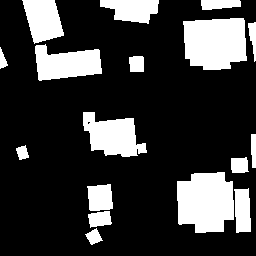

In [0]:
SHOW_IM(im.replace('images', 'masks').replace('.png', '_mask.png')) # The corresponding mask

In [0]:
# You could fetch all the data with:
# for a in areas:
#   save_area_id_images(area = a[0], img_id = a[1], label_id=a[2], zoom_level = 19, tile_size = 256)

In [0]:
import cv2
from google.colab.patches import cv2_imshow #Cannot use cv2.imshow
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Dropout, Input, Lambda, MaxPooling2D, Conv2DTranspose, concatenate
import numpy as np

# from google.colab import drive
# drive.mount('/content/drive')
import glob, random
from sklearn.metrics import jaccard_score

#List of loss functions

In [0]:
#Define model
import tensorflow as tf
from keras import backend as K
from keras.losses import binary_crossentropy
from __future__ import print_function, division
# define our own loss function using jaccard
def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)
    
def mixed_loss(y_true, y_pred):
  def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=(1,2,3))
    denominator = tf.reduce_sum(y_true + y_pred, axis=(1,2,3))

    return tf.reshape(1 - numerator / denominator, (-1, 1, 1))

  return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

def weighted_cross_entropy(beta):
  def convert_to_logits(y_pred):
      y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

      return tf.log(y_pred / (1 - y_pred))

  def loss(y_true, y_pred):
    y_pred = convert_to_logits(y_pred)
    loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, targets=y_true, pos_weight=beta)

    # or reduce_sum and/or axis=-1
    return tf.reduce_mean(loss)

  return loss

def balanced_cross_entropy(beta):
  def convert_to_logits(y_pred):
      y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

      return tf.log(y_pred / (1 - y_pred))

  def loss(y_true, y_pred):
    y_pred = convert_to_logits(y_pred)
    pos_weight = beta / (1 - beta)
    loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, targets=y_true, pos_weight=pos_weight)

    # or reduce_sum and/or axis=-1
    return tf.reduce_mean(loss * (1 - beta))

  return loss

def focal_loss(alpha=0.25, gamma=2):
  def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
    weight_a = alpha * (1 - y_pred) ** gamma * targets
    weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)
    
    return (tf.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b 

  def loss(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    logits = tf.log(y_pred / (1 - y_pred))

    loss = focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)

    # or reduce_sum and/or axis=-1
    return tf.reduce_mean(loss)

  return loss

def tversky_loss(beta):
  def loss(y_true, y_pred):
    numerator = tf.reduce_sum(y_true * y_pred, axis=-1)
    denominator = y_true * y_pred + beta * (1 - y_true) * y_pred + (1 - beta) * y_true * (1 - y_pred)

    return 1 - (numerator + 1) / (tf.reduce_sum(denominator, axis=-1) + 1)

  return loss

def lovasz_grad(gt_sorted):
    """
    Computes gradient of the Lovasz extension w.r.t sorted errors
    See Alg. 1 in paper
    """
    gts = tf.reduce_sum(gt_sorted)
    intersection = gts - tf.cumsum(gt_sorted)
    union = gts + tf.cumsum(1. - gt_sorted)
    jaccard = 1. - intersection / union
    jaccard = tf.concat((jaccard[0:1], jaccard[1:] - jaccard[:-1]), 0)
    return jaccard


# --------------------------- BINARY LOSSES ---------------------------


def lovasz_hinge(logits, labels, per_image=True, ignore=None):
    """
    Binary Lovasz hinge loss
      logits: [B, H, W] Variable, logits at each pixel (between -\infty and +\infty)
      labels: [B, H, W] Tensor, binary ground truth masks (0 or 1)
      per_image: compute the loss per image instead of per batch
      ignore: void class id
    """
    if per_image:
        def treat_image(log_lab):
            log, lab = log_lab
            log, lab = tf.expand_dims(log, 0), tf.expand_dims(lab, 0)
            log, lab = flatten_binary_scores(log, lab, ignore)
            return lovasz_hinge_flat(log, lab)
        losses = tf.map_fn(treat_image, (logits, labels), dtype=tf.float32)
        loss = tf.reduce_mean(losses)
    else:
        loss = lovasz_hinge_flat(*flatten_binary_scores(logits, labels, ignore))
    return loss


def lovasz_hinge_flat(logits, labels):
    """
    Binary Lovasz hinge loss
      logits: [P] Variable, logits at each prediction (between -\infty and +\infty)
      labels: [P] Tensor, binary ground truth labels (0 or 1)
      ignore: label to ignore
    """

    def compute_loss():
        labelsf = tf.cast(labels, logits.dtype)
        signs = 2. * labelsf - 1.
        errors = 1. - logits * tf.stop_gradient(signs)
        errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0], name="descending_sort")
        gt_sorted = tf.gather(labelsf, perm)
        grad = lovasz_grad(gt_sorted)
        loss = tf.tensordot(tf.nn.relu(errors_sorted), tf.stop_gradient(grad), 1, name="loss_non_void")
        return loss

    # deal with the void prediction case (only void pixels)
    loss = tf.cond(tf.equal(tf.shape(logits)[0], 0),
                   lambda: tf.reduce_sum(logits) * 0.,
                   compute_loss,
                   strict=True,
                   name="loss"
                   )
    return loss


def flatten_binary_scores(scores, labels, ignore=None):
    """
    Flattens predictions in the batch (binary case)
    Remove labels equal to 'ignore'
    """
    scores = tf.reshape(scores, (-1,))
    labels = tf.reshape(labels, (-1,))
    if ignore is None:
        return scores, labels
    valid = tf.not_equal(labels, ignore)
    vscores = tf.boolean_mask(scores, valid, name='valid_scores')
    vlabels = tf.boolean_mask(labels, valid, name='valid_labels')
    return vscores, vlabels


# --------------------------- MULTICLASS LOSSES ---------------------------


def lovasz_softmax(probas, labels, classes='present', per_image=False, ignore=None, order='BHWC'):
    """
    Multi-class Lovasz-Softmax loss
      probas: [B, H, W, C] or [B, C, H, W] Variable, class probabilities at each prediction (between 0 and 1)
              Interpreted as binary (sigmoid) output with outputs of size [B, H, W].
      labels: [B, H, W] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
      per_image: compute the loss per image instead of per batch
      ignore: void class labels
      order: use BHWC or BCHW
    """
    if per_image:
        def treat_image(prob_lab):
            prob, lab = prob_lab
            prob, lab = tf.expand_dims(prob, 0), tf.expand_dims(lab, 0)
            prob, lab = flatten_probas(prob, lab, ignore, order)
            return lovasz_softmax_flat(prob, lab, classes=classes)
        losses = tf.map_fn(treat_image, (probas, labels), dtype=tf.float32)
        loss = tf.reduce_mean(losses)
    else:
        loss = lovasz_softmax_flat(*flatten_probas(probas, labels, ignore, order), classes=classes)
    return loss


def lovasz_softmax_flat(probas, labels, classes='present'):
    """
    Multi-class Lovasz-Softmax loss
      probas: [P, C] Variable, class probabilities at each prediction (between 0 and 1)
      labels: [P] Tensor, ground truth labels (between 0 and C - 1)
      classes: 'all' for all, 'present' for classes present in labels, or a list of classes to average.
    """
    C = probas.shape[1]
    losses = []
    present = []
    class_to_sum = list(range(C)) if classes in ['all', 'present'] else classes
    for c in class_to_sum:
        fg = tf.cast(tf.equal(labels, c), probas.dtype)  # foreground for class c
        if classes == 'present':
            present.append(tf.reduce_sum(fg) > 0)
        if C == 1:
            if len(classes) > 1:
                raise ValueError('Sigmoid output possible only with 1 class')
            class_pred = probas[:, 0]
        else:
            class_pred = probas[:, c]
        errors = tf.abs(fg - class_pred)
        errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0], name="descending_sort_{}".format(c))
        fg_sorted = tf.gather(fg, perm)
        grad = lovasz_grad(fg_sorted)
        losses.append(
            tf.tensordot(errors_sorted, tf.stop_gradient(grad), 1, name="loss_class_{}".format(c))
                      )
    if len(class_to_sum) == 1:  # short-circuit mean when only one class
        return losses[0]
    losses_tensor = tf.stack(losses)
    if classes == 'present':
        present = tf.stack(present)
        losses_tensor = tf.boolean_mask(losses_tensor, present)
    loss = tf.reduce_mean(losses_tensor)
    return loss


def flatten_probas(probas, labels, ignore=None, order='BHWC'):
    """
    Flattens predictions in the batch
    """
    if len(probas.shape) == 3:
        probas, order = tf.expand_dims(probas, 3), 'BHWC'
    if order == 'BCHW':
        probas = tf.transpose(probas, (0, 2, 3, 1), name="BCHW_to_BHWC")
        order = 'BHWC'
    if order != 'BHWC':
        raise NotImplementedError('Order {} unknown'.format(order))
    C = probas.shape[3]
    probas = tf.reshape(probas, (-1, C))
    labels = tf.reshape(labels, (-1,))
    if ignore is None:
        return probas, labels
    valid = tf.not_equal(labels, ignore)
    vprobas = tf.boolean_mask(probas, valid, name='valid_probas')
    vlabels = tf.boolean_mask(labels, valid, name='valid_labels')
    return vprobas, vlabels


# Try different model and network



In [0]:

#1. Model neural network đơn giản feedforward
model = Sequential([
    Dense( 1000, input_shape = (65536,), activation='relu' ),
    Dropout(0.2),
    # Dense(600 , activation='relu' ),
    Dense( 1000 , activation='relu' ),
    Dropout(0.2), 
    # Dense( 1000 , activation='relu' ),
    Dense( 1000 , activation='relu' ),
    Dropout(0.2),
    # Dense( 65536 , activation='relu' ),
    Dense( 65536,  activation='sigmoid' )
])

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss=[jaccard_distance], metrics = ['mae', 'mse'])
model.summary()

In [0]:
#2. Model sử dụng Unet

input_height = 256
input_width = 256
img_channels = 3

inputs = Input((input_height, input_width, img_channels))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=[mixed_loss], metrics=['acc'])

In [0]:
from __future__ import print_function

import numpy as np
import warnings

from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs


WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 1
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 1
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    """Instantiates the ResNet50 architecture.
    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.
    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or `(3, 224, 244)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 197.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=256,
                                      min_size=197,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if K.image_data_format() == 'channels_last':
        bn_axis = 1
    else:
        bn_axis = 1

    x = ZeroPadding2D((1, 1))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((1, 1), strides=(2, 2))(x)

    x = conv_block(x, 1, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 1, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 1, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 1, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 1, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 1, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 1, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 1, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 1, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 1, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 1, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 1, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 1, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 1, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 1, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 1, [512, 512, 2048], stage=5, block='c')

    x = AveragePooling2D((7, 7), name='avg_pool')(x)

    if include_top:
        x = Flatten()(x)
        x = Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnet50')

    # # load weights
    # if weights == 'imagenet':
    #     if include_top:
    #         weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
    #                                 WEIGHTS_PATH,
    #                                 cache_subdir='models',
    #                                 md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
    #     else:
    #         weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
    #                                 WEIGHTS_PATH_NO_TOP,
    #                                 cache_subdir='models',
    #                                 md5_hash='a268eb855778b3df3c7506639542a6af')
    #     model.load_weights(weights_path)
    #     if K.backend() == 'theano':
    #         layer_utils.convert_all_kernels_in_model(model)

    #     if K.image_data_format() == 'channels_first':
    #         if include_top:
    #             maxpool = model.get_layer(name='avg_pool')
    #             shape = maxpool.output_shape[1:]
    #             dense = model.get_layer(name='fc1000')
    #             layer_utils.convert_dense_weights_data_format(dense, shape, 'channels_first')

    #         if K.backend() == 'tensorflow':
    #             warnings.warn('You are using the TensorFlow backend, yet you '
    #                           'are using the Theano '
    #                           'image data format convention '
    #                           '(`image_data_format="channels_first"`). '
    #                           'For best performance, set '
    #                           '`image_data_format="channels_last"` in '
    #                           'your Keras config '
    #                           'at ~/.keras/keras.json.')
    return model


if __name__ == '__main__':
    model = ResNet50(include_top=True, weights='imagenet')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) 

In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_33 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_11 (ZeroPadding2 (None, 258, 258, 3)  0           input_33[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 126, 126, 64) 9472        zero_padding2d_11[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 126, 126, 64) 504         conv1[0][0]                      
___________________________________________________________________________________________

#Load data for training

In [0]:
#Load data and train model 
def load_to_grayim(im_path):
  original_im = cv2.imread(im_path)
  return cv2.cvtColor(original_im, cv2.COLOR_BGR2GRAY)

def grayim_to_binary(im_array):
  return im_array/255

images = glob.glob('/content/drive/My Drive/Colab Notebooks/data/images-256/*.png')
cutoff_point = int(len(images)*0.75)
train_set = images[:cutoff_point]
test_set = images[cutoff_point:]

X, Y = [], []
for im in train_set:
  im_mask =  im.replace('images', 'masks').replace('.png', '_mask.png')
  
  im_data = load_to_grayim(im).reshape(65536, 1)
  im_mask_data = load_to_grayim(im_mask).reshape(65536, 1)
  X.append(im_data)
  Y.append(grayim_to_binary( im_mask_data) )

  # #Fit model
  # model.fit( im_data, im_mask_data )
  
X = np.array(X).reshape(344,65536)
Y = np.array(Y).reshape(344,65536)
  


In [0]:
def load_to_grayim(im_path):
  original_im = cv2.imread(im_path)
  return cv2.cvtColor(original_im, cv2.COLOR_BGR2GRAY)

def grayim_to_binary(im_array):
  return im_array/255

images = glob.glob('/content/drive/My Drive/Colab Notebooks/data/images-256/*.png')
cutoff_point = int(len(images)*0.75)
train_set = images[:cutoff_point]
test_set = images[cutoff_point:]

X, Y = [], []
for im in train_set:
  im_mask =  im.replace('images', 'masks').replace('.png', '_mask.png')
  
  im_data = cv2.imread(im)
  # im_mask_data = cv2.imread(im_mask)
  #Chuyển thành dạng 0-1
  im_mask_data = load_to_grayim(im_mask)/255
  X.append(im_data)
  Y.append(im_mask_data) 

  # #Fit model
  # model.fit( im_data, im_mask_data )
  
X = np.array(X)
Y = np.array(Y)

In [0]:
Y = Y.reshape(344,256,256,1)

In [0]:
X.shape

(344, 256, 256, 3)

In [0]:
X = np.array(X).reshape(344,256,256,1)
Y = np.array(Y).reshape(344,65536)

#Train model

In [0]:
model_v1 = model.fit(X, Y, batch_size= 1, epochs= 10)

In [0]:
#Unet with mixed_loss
model_v2 = model.fit(X, Y, validation_split=0.1, batch_size=1, epochs=25)

Train on 309 samples, validate on 35 samples
Epoch 1/25
309/309 [==============================] - 7s 21ms/step - loss: 0.8236 - acc: 0.8442 - val_loss: 0.9638 - val_acc: 0.8198
Epoch 2/25
309/309 [==============================] - 6s 21ms/step - loss: 0.8198 - acc: 0.8431 - val_loss: 0.9097 - val_acc: 0.8211
Epoch 3/25
309/309 [==============================] - 7s 21ms/step - loss: 0.8115 - acc: 0.8477 - val_loss: 0.8750 - val_acc: 0.8403
Epoch 4/25
309/309 [==============================] - 7s 22ms/step - loss: 0.8217 - acc: 0.8442 - val_loss: 1.0045 - val_acc: 0.7731
Epoch 5/25
309/309 [==============================] - 7s 21ms/step - loss: 0.8238 - acc: 0.8415 - val_loss: 0.9071 - val_acc: 0.8298
Epoch 6/25
309/309 [==============================] - 6s 21ms/step - loss: 0.8122 - acc: 0.8476 - val_loss: 0.8756 - val_acc: 0.8409
Epoch 7/25
309/309 [==============================] - 7s 21ms/step - loss: 0.8119 - acc: 0.8466 - val_loss: 0.8993 - val_acc: 0.8300
Epoch 8/25
309/309 [====

In [0]:
#Unet with jaccard loss
model_v3 = model.fit(X, Y, validation_split=0.1, batch_size=3, epochs=20)

ValueError: ignored

#Test result

In [0]:
#Evaluate results
test_set = images[cutoff_point:]
def show_im_from_binary(data_bin):
  cv2_imshow( data_bin.reshape(256, 256)*255 )

def show_im_from_path(path):
  cv2_imshow( cv2.imread(path) )

X_test, Y_test = [], []
jaccards = []
for im in test_set[:5]:
  im_mask =  im.replace('images', 'masks').replace('.png', '_mask.png')
  
  im_data = load_to_grayim(im).reshape(1, 65536)
  y_pred = model.predict(im_data).astype(int)

  im_mask_data = load_to_grayim(im_mask).reshape(1, 65536)
  y_true = np.where(im_mask_data == 255, 1, im_mask_data)
  # X_test.append(im_data)
  # Y_test.append(im_mask_data)

  jaccards.append( jaccard_score(y_true, y_pred, average= 'micro') )

  #Show real image and pred image
  print('-'*5, im, '-'*5, '\n Real IM')
  show_im_from_path( im_mask )
  print('Predict IM')
  show_im_from_binary(y_pred)
np.mean( jaccards )  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0.4056402444062799

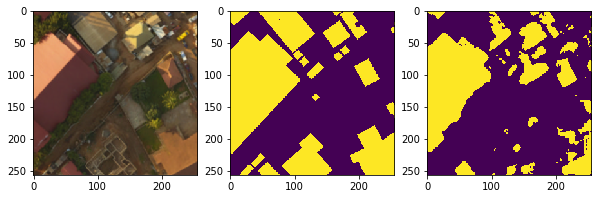

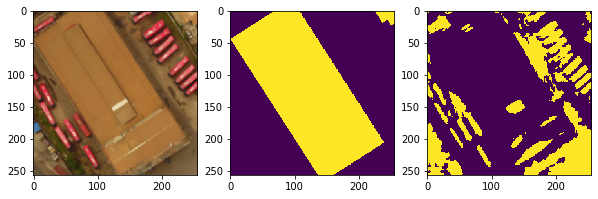

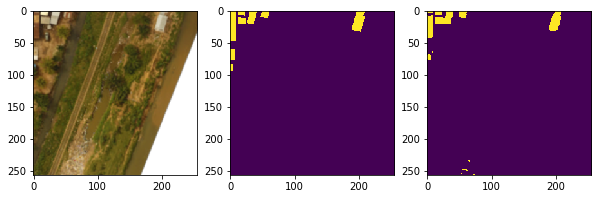

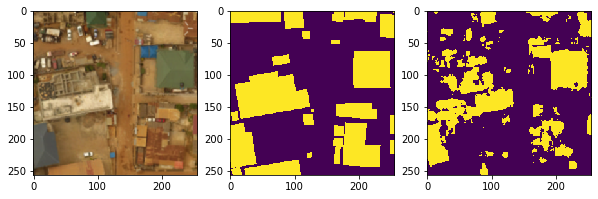

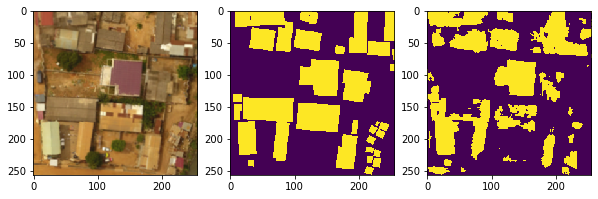

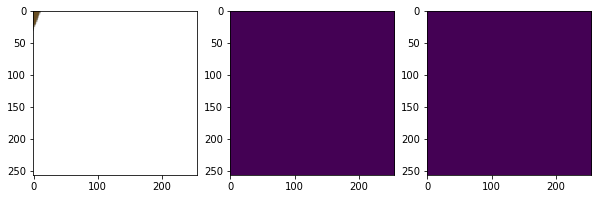

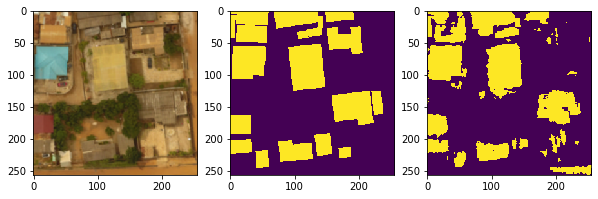

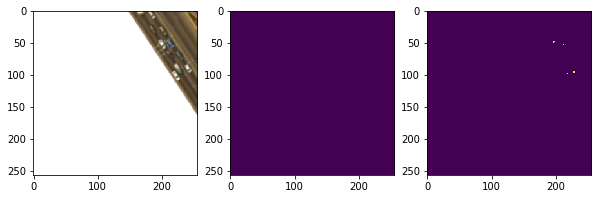

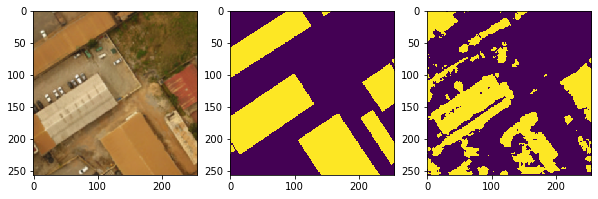

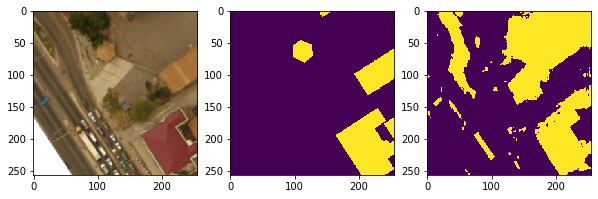

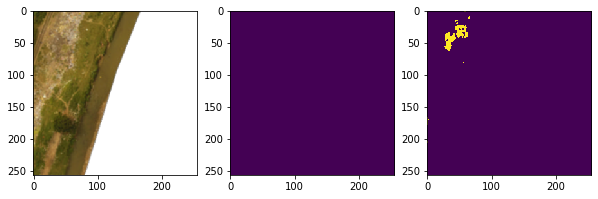

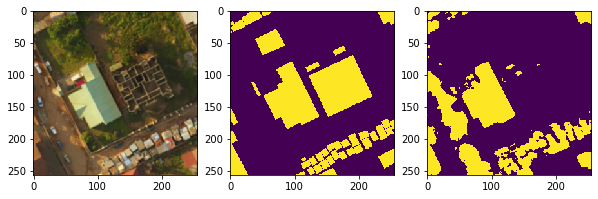

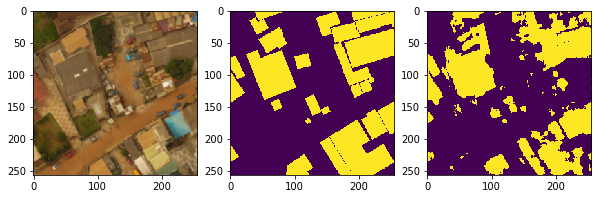

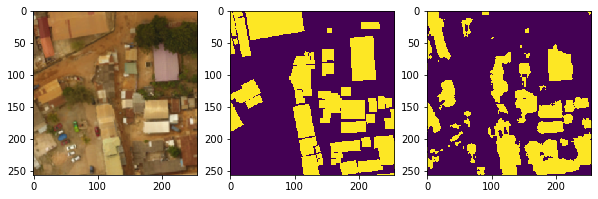

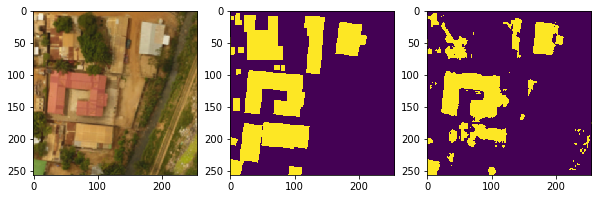

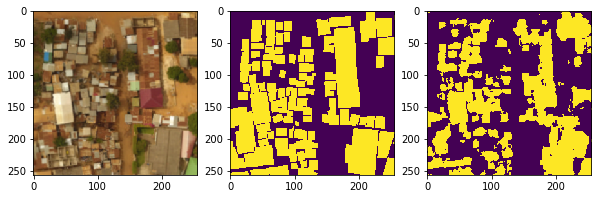

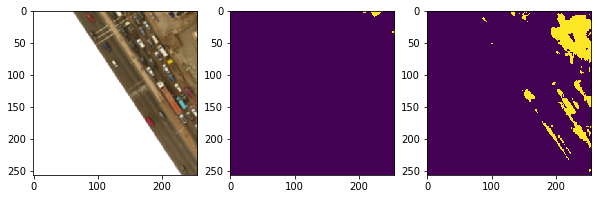

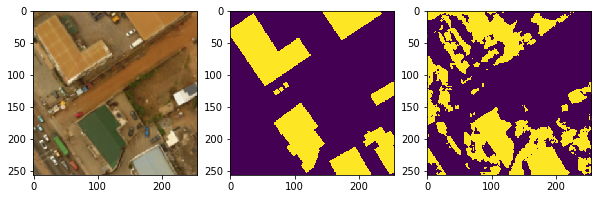

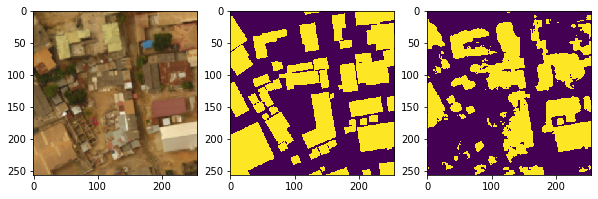

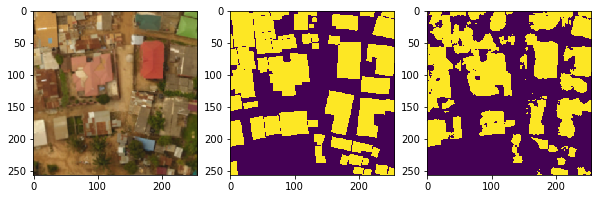

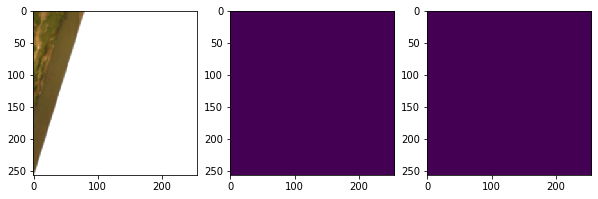

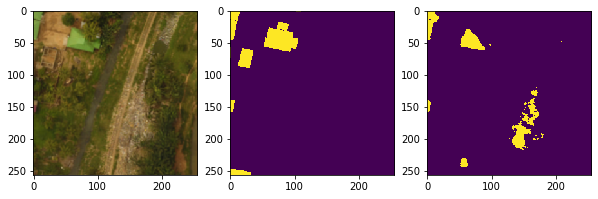

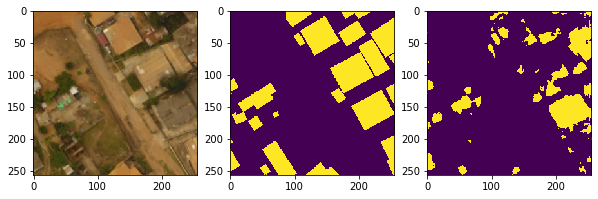

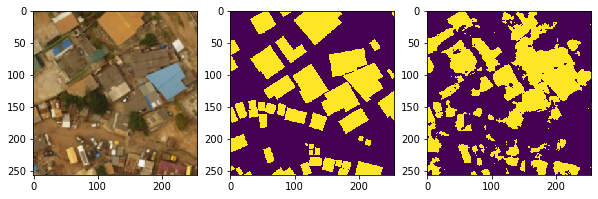

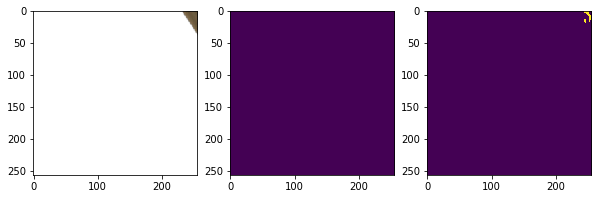

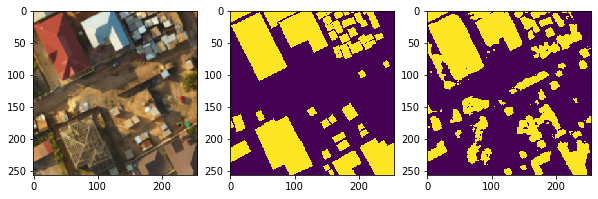

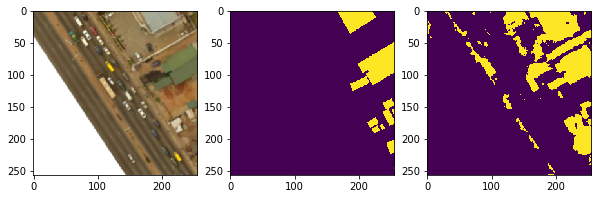

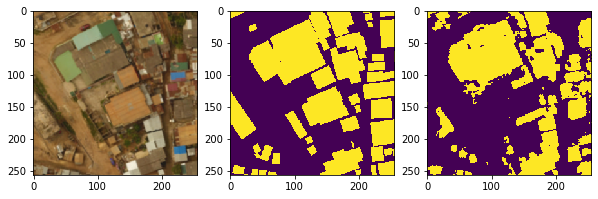

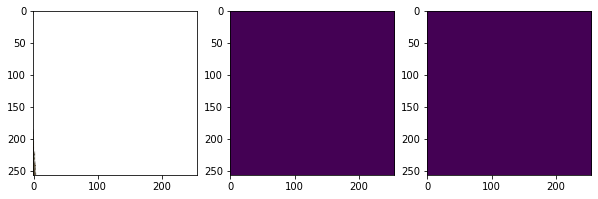

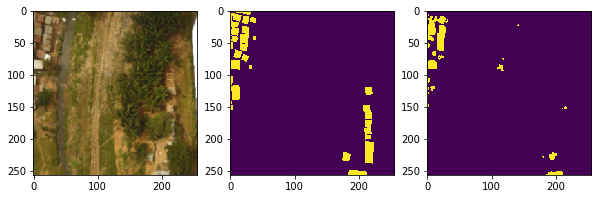

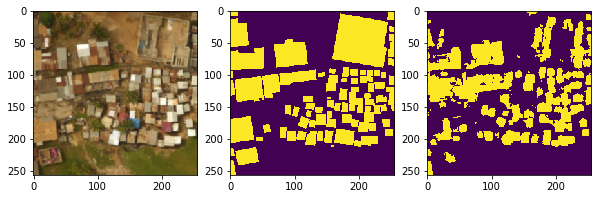

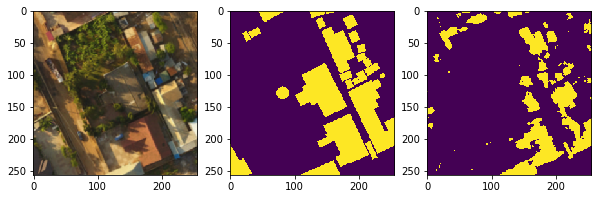

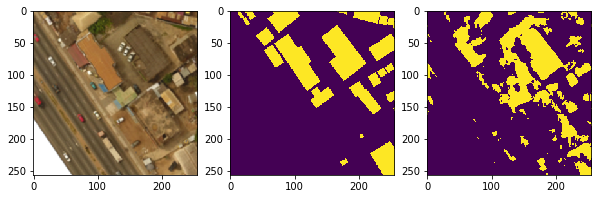

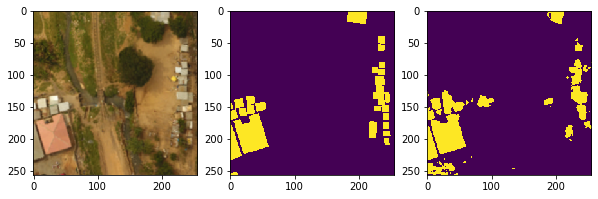

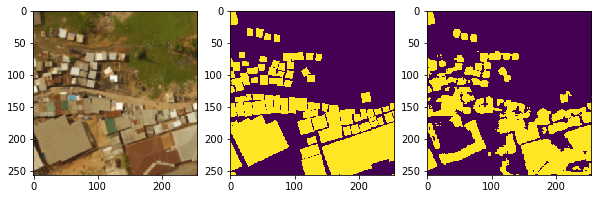

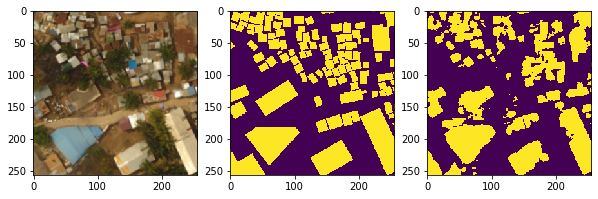

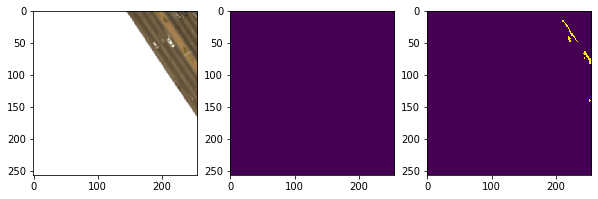

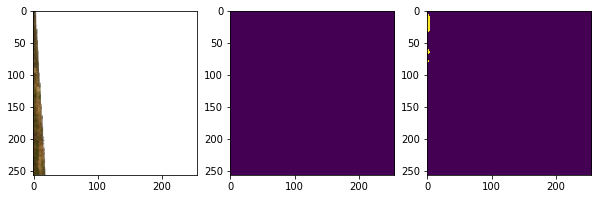

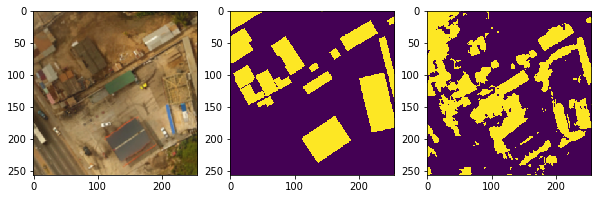

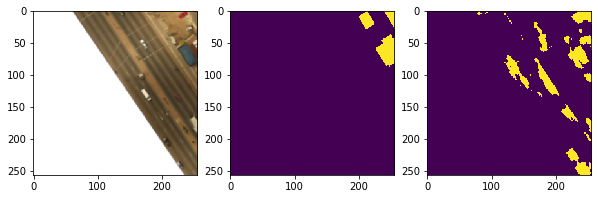

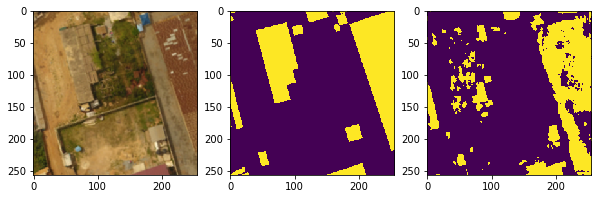

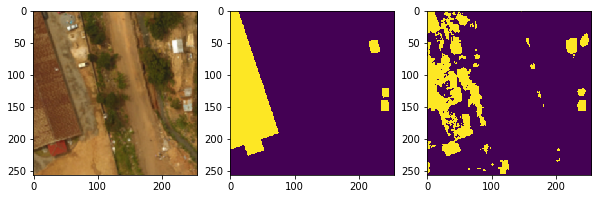

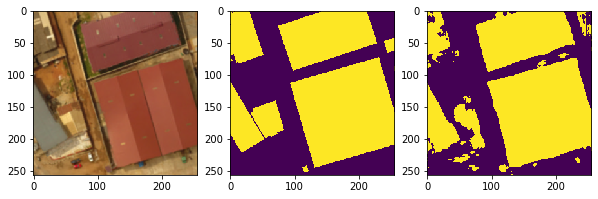

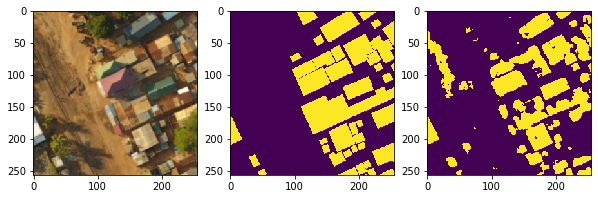

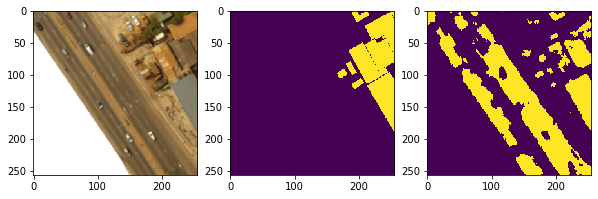

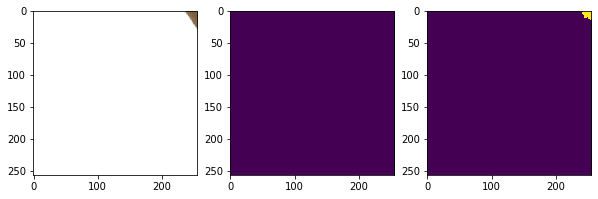

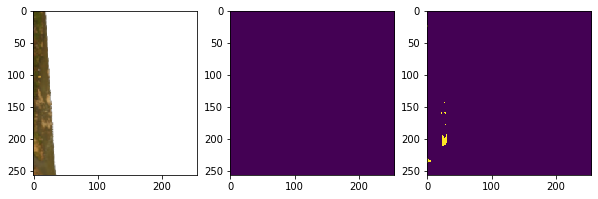

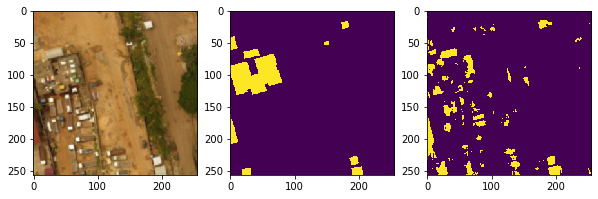

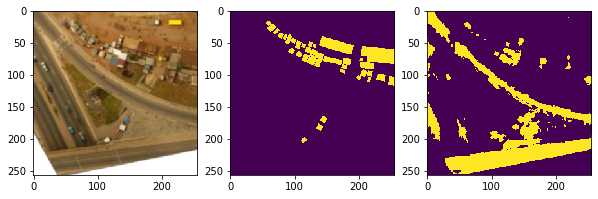

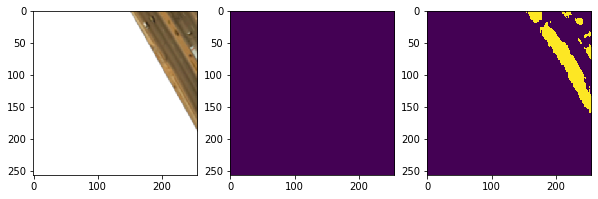

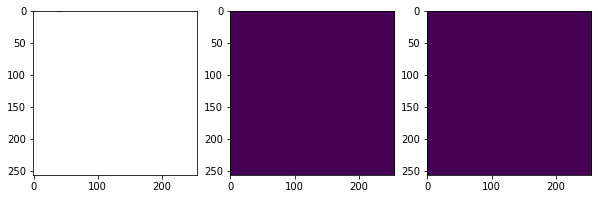

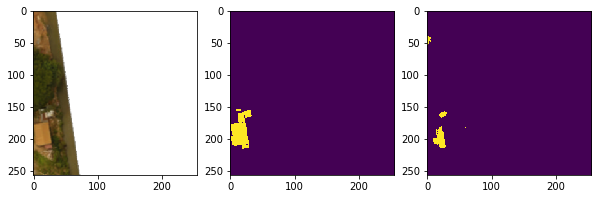

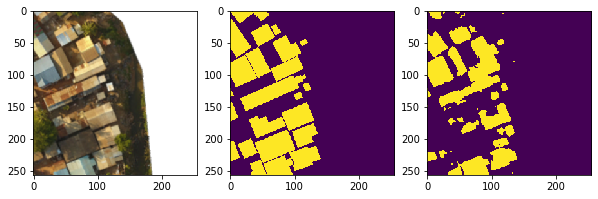

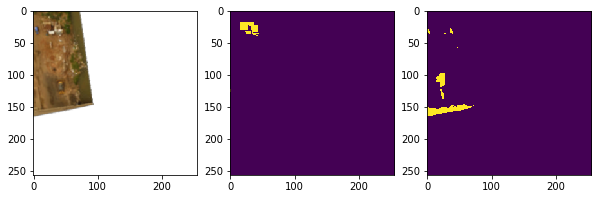

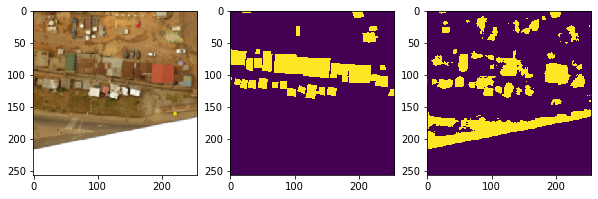

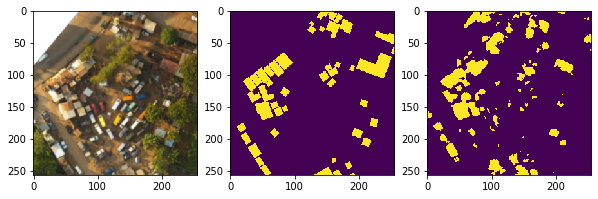

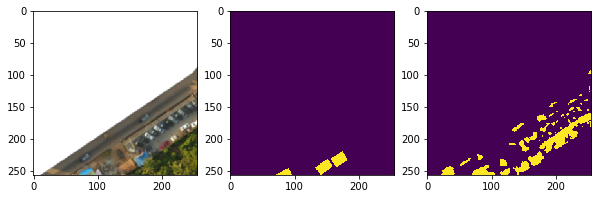

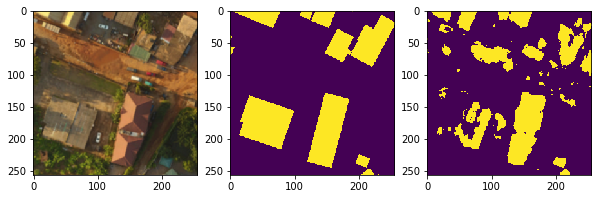

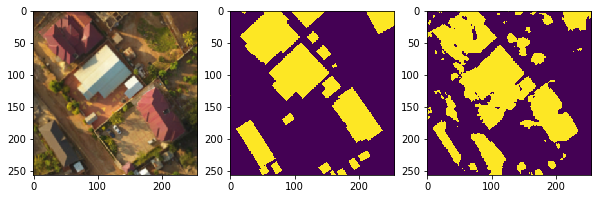

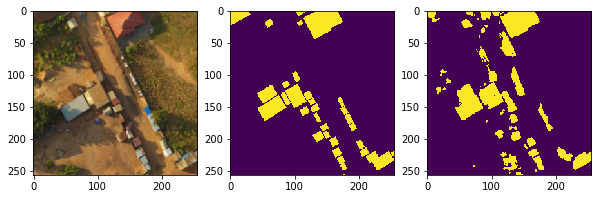

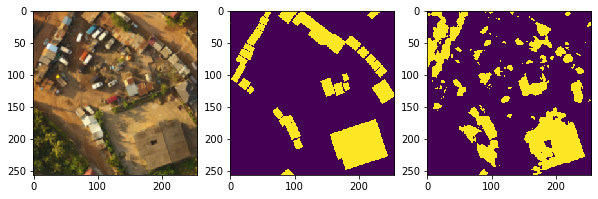

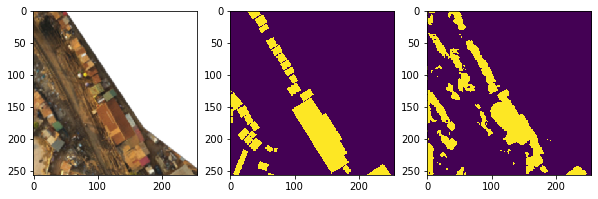

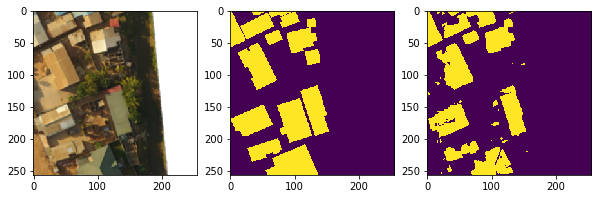

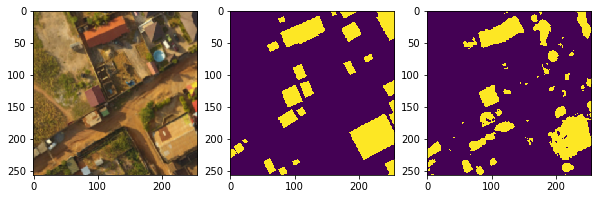

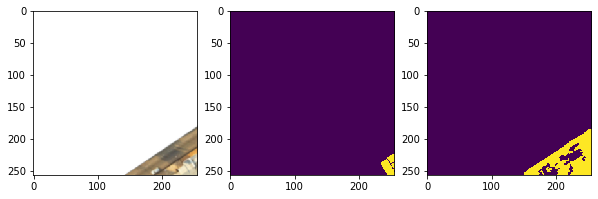

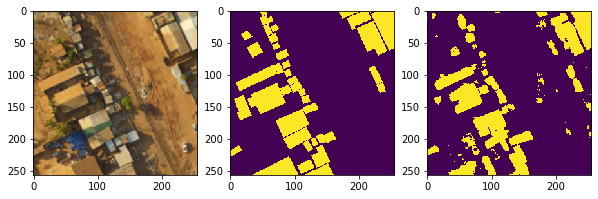

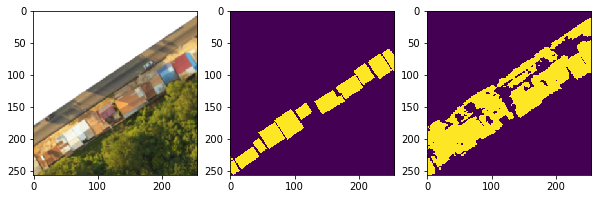

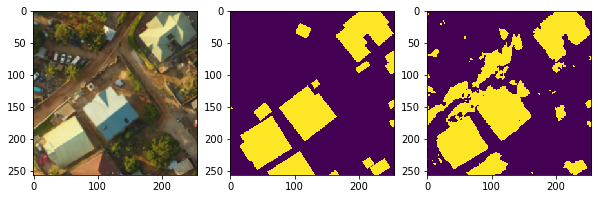

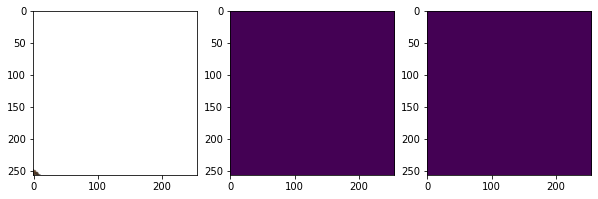

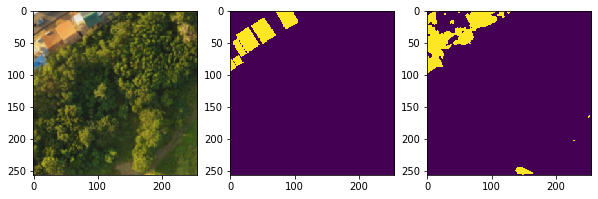

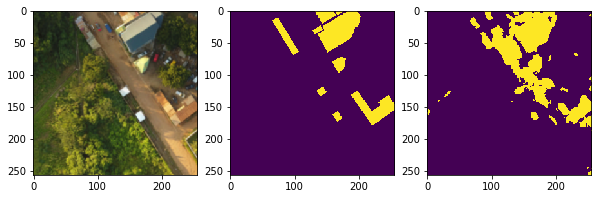

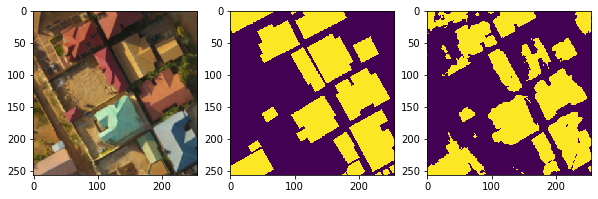

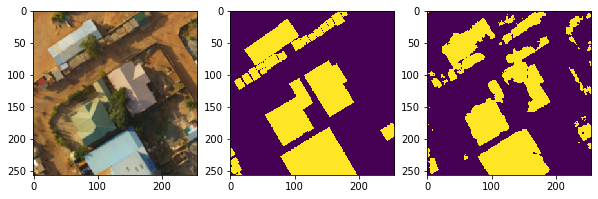

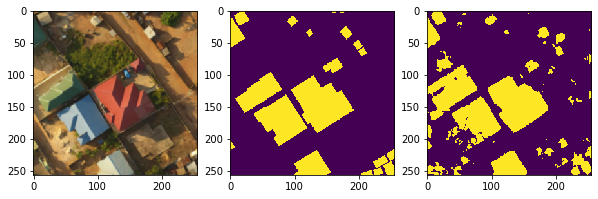

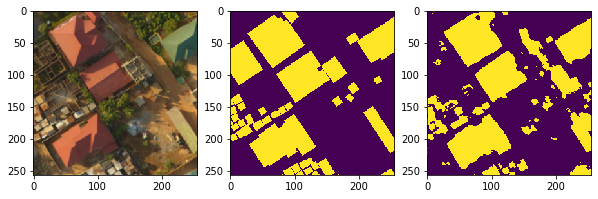

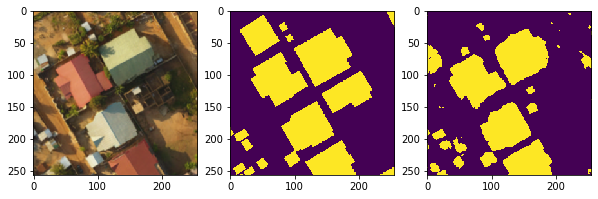

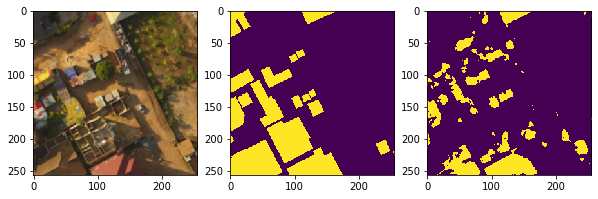

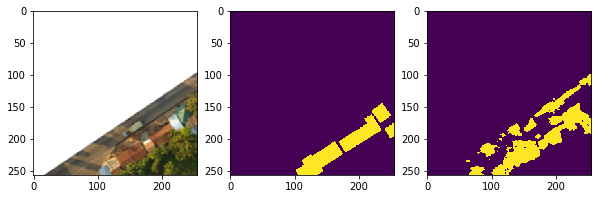

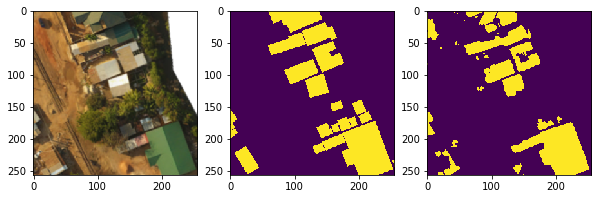

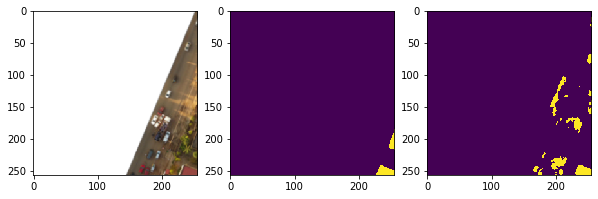

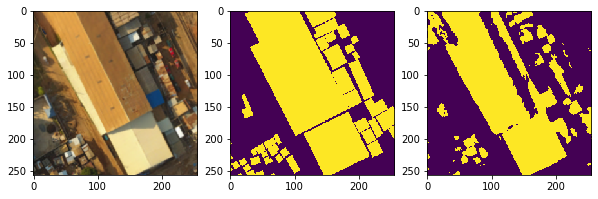

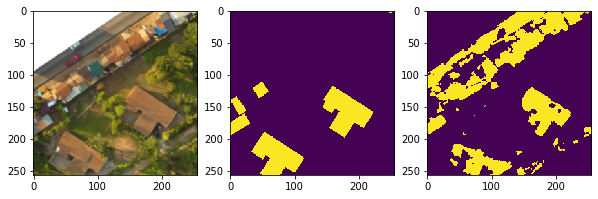

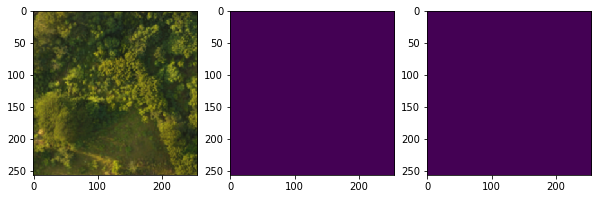

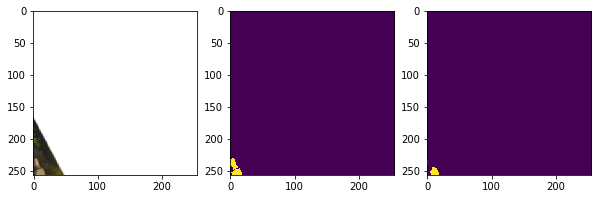

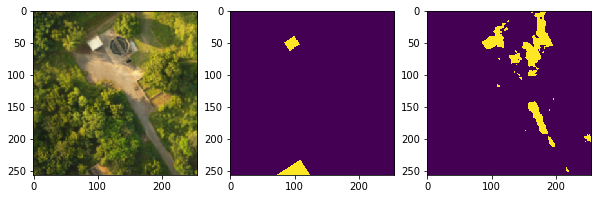

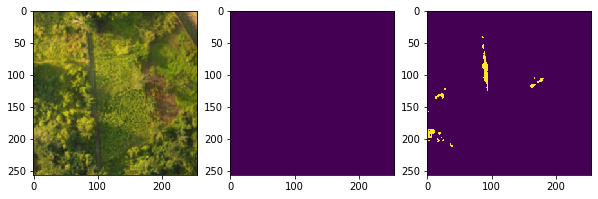

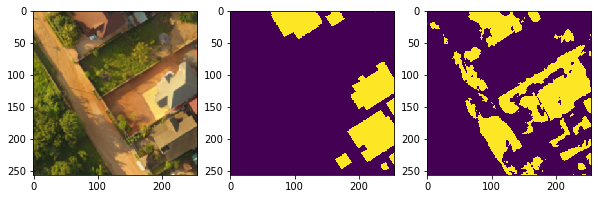

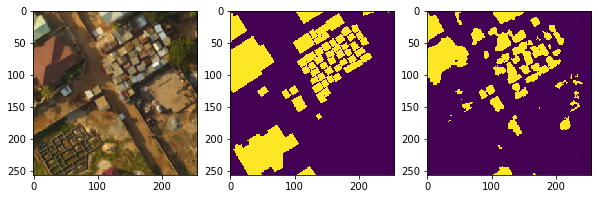

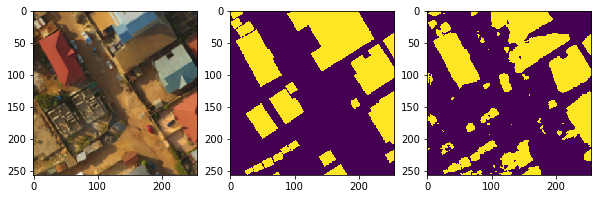

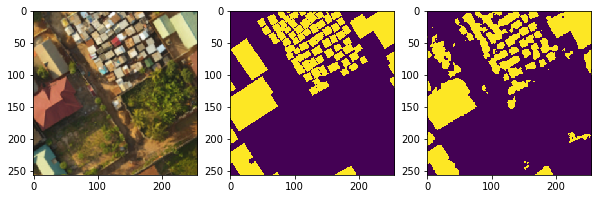

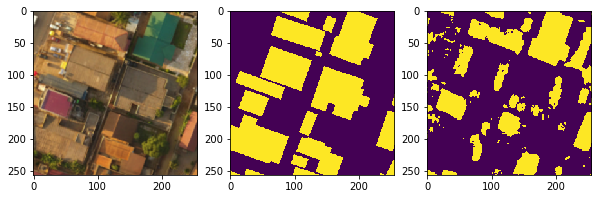

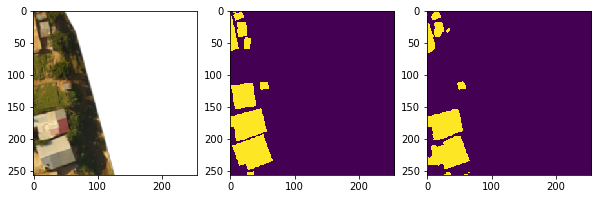

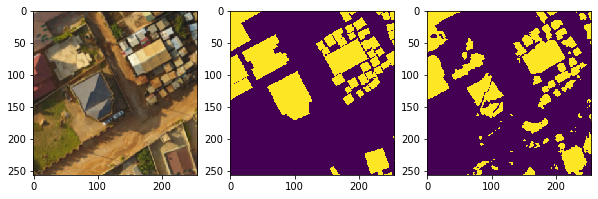

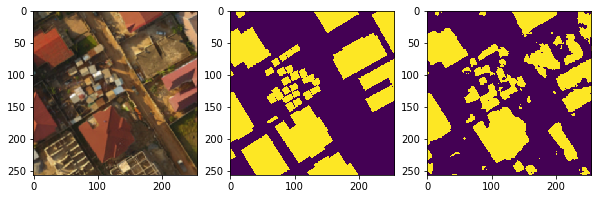

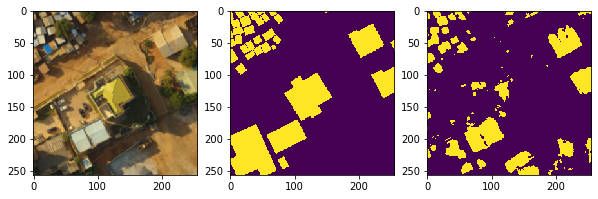

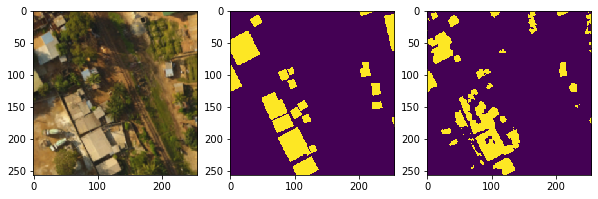

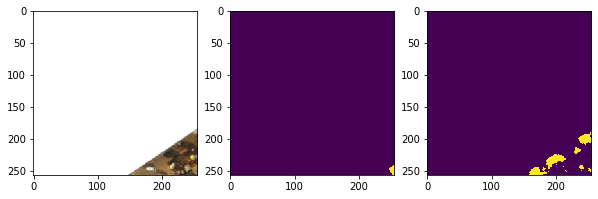

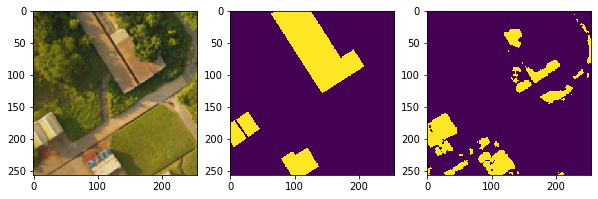

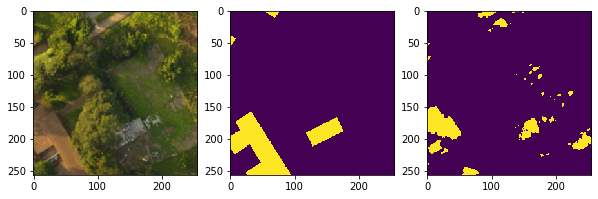

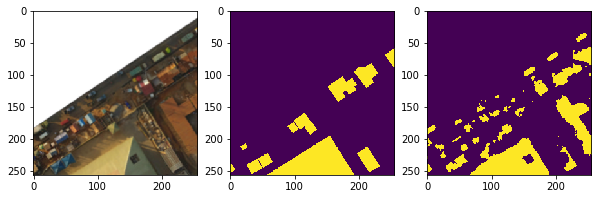

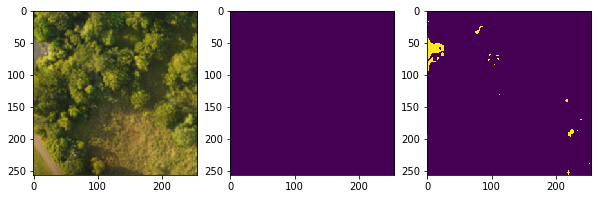

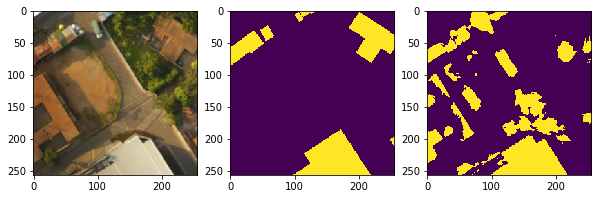

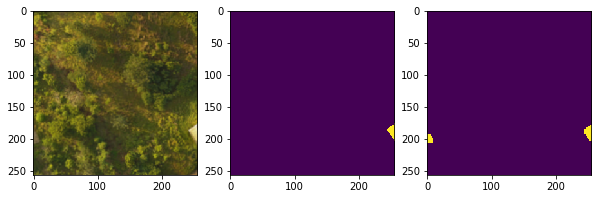

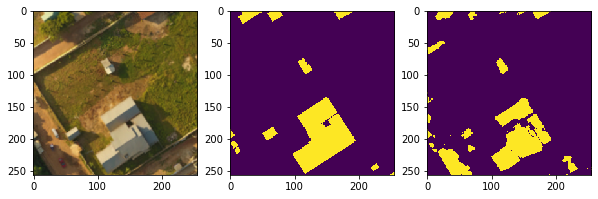

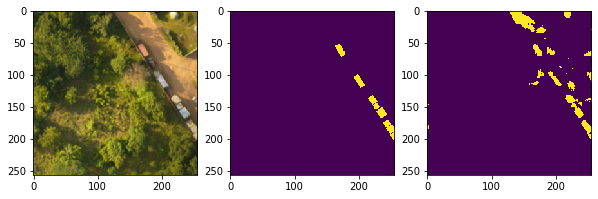

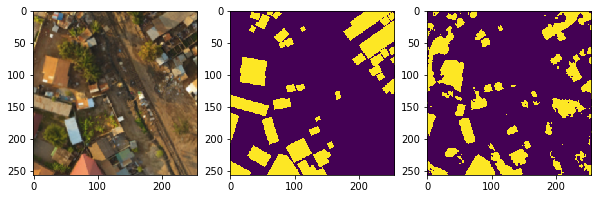

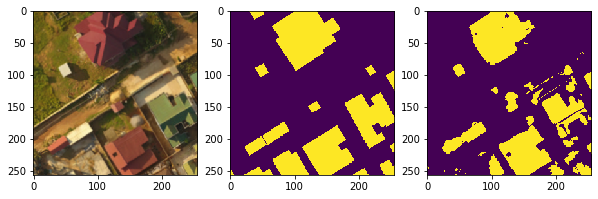

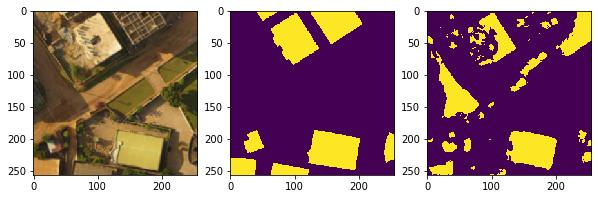

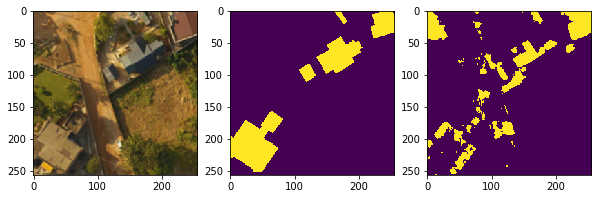

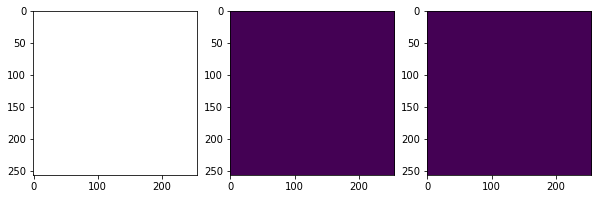

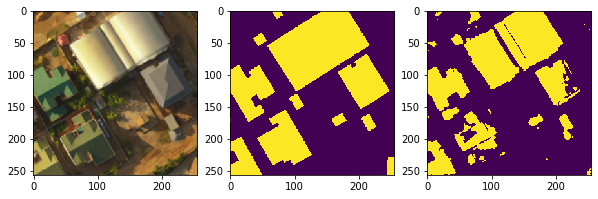

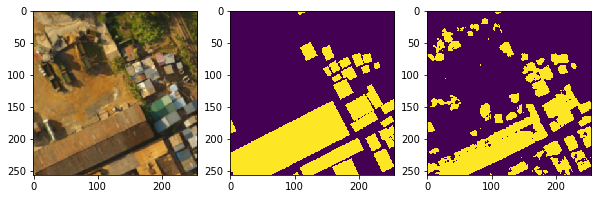

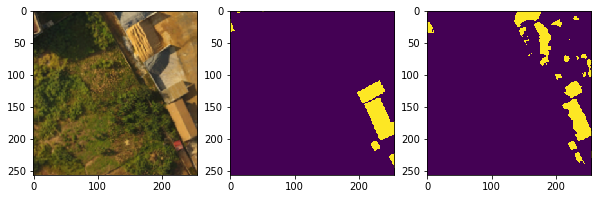

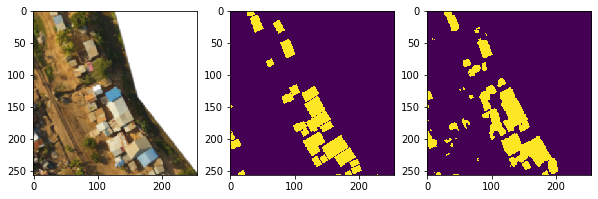

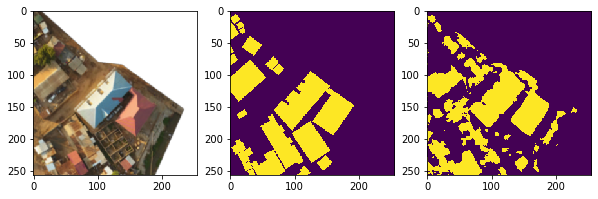

In [0]:
#Evaluate results
import matplotlib.pyplot as plt
from skimage import io
test_set = images[cutoff_point:]
def show_im_from_binary(data_bin):
  cv2_imshow( data_bin.reshape(256, 256)*255 )

def show_im_from_path(path):
  cv2_imshow( cv2.imread(path) )

X_test, Y_test = [], []
jaccards = []
for im in test_set:
  im_mask =  im.replace('images', 'masks').replace('.png', '_mask.png')
  
  im_data = np.array([cv2.imread(im)])
  # y_pred_color = model.predict(im_data)
  # y_pred = cv2.cvtColor(y_pred_color[0], cv2.COLOR_BGR2GRAY)
  # y_pred = np.around(y_pred)
  y_pred = np.around(model_v2.model.predict(im_data))[0].reshape(256,256)

  im_mask_data = load_to_grayim(im_mask)
  y_true = im_mask_data/255
  # X_test.append(im_data)
  # Y_test.append(im_mask_data)

  jaccards.append( jaccard_score(y_true, y_pred, average= 'micro') )

  #Show real image and pred image
  fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
  ax1.imshow(skimage.io.imread(im))
  ax2.imshow(skimage.io.imread(im_mask))
  ax3.imshow(y_pred*255)
  # print('-'*10, im, '-'*10, '\n Real IM')
  # show_im_from_path( im_mask )
  # show_im_from_path( im )
  # print('Predict IM')
  # cv2_imshow(y_pred*255)
np.mean( jaccards )  